# Linear Regression Project: California Housing Price Prediction

A real estate agent and wants some help predicting housing prices for california. Task is to create a model for her that allows to put in a few features of a house and returns back an estimate of what the house would sell for. I decided that Linear Regression might be a good path to solve this problem! The agent gives some information about a bunch of houses in regions of the United States,it is all in the data set: ("California_Housing.csv").

### The data contains the following columns:

longitude (signed numeric - float) : Longitude value for the block in California, USA

latitude (numeric - float ) : Latitude value for the block in California, USA

housing_median_age (numeric - int ) : Median age of the house in the block

total_rooms (numeric - int ) : Count of the total number of rooms (excluding bedrooms) in all houses in the block

total_bedrooms (numeric - float ) : Count of the total number of bedrooms in all houses in the block

population (numeric - int ) : Count of the total number of population in the block

households (numeric - int ) : Count of the total number of households in the block

median_income (numeric - float ) : Median of the total household income of all the houses in the block

ocean_proximity (numeric - categorical ) : Type of the landscape of the block

median_house_value (numeric - int ) : Median of the household prices of all the houses in the block

# Check out the data

### Import Libraries

In [223]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [224]:
house_price=pd.read_csv('California-housing.csv')

In [225]:
house_price.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [226]:
house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [227]:
house_price.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# Look for missing value in dataset

<Axes: >

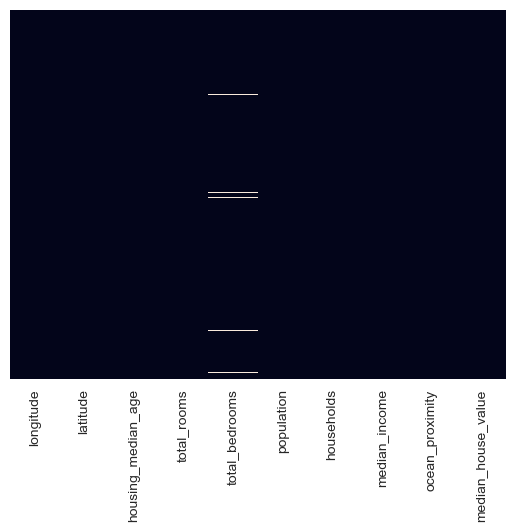

In [228]:
sns.heatmap(house_price.isnull(),yticklabels=False,cbar=False)

total_bedrooms columns have missing values 

In [229]:
house_price[house_price['total_bedrooms'].isnull()].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
290,-122.16,37.77,47,1256,NaN,570,218,4.3750,NEAR BAY,161900
341,-122.17,37.75,38,992,NaN,732,259,1.6196,NEAR BAY,85100
538,-122.28,37.78,29,5154,NaN,3741,1273,2.5762,NEAR BAY,173400
563,-122.24,37.75,45,891,NaN,384,146,4.9489,NEAR BAY,247100
696,-122.10,37.69,41,746,NaN,387,161,3.9063,NEAR BAY,178400


In [230]:
house_price['total_bedrooms'].fillna(house_price['total_bedrooms'].mean(),inplace=True)

No Missing values left

<Axes: >

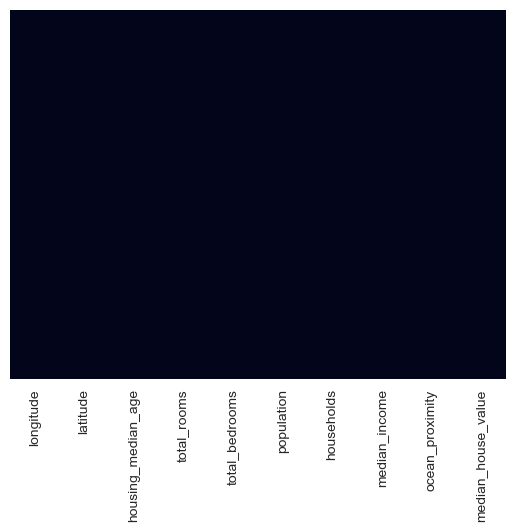

In [231]:
sns.heatmap(house_price.isnull(),yticklabels=False,cbar=False)

# Exploratory Data Analysis 

Plotting the relation between all the features

Plotting a distribution plot of Price  

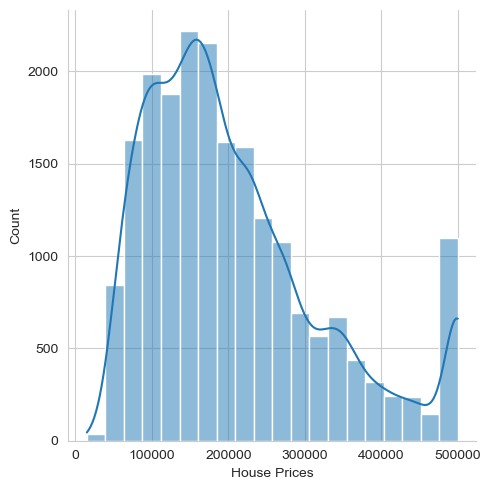

In [68]:

sns.set_style('whitegrid')
sns.displot(house_price['median_house_value'],kde=True,bins=20)
plt.xlabel('House Prices')
plt.show()

Graph of Population vs Ocean Proximity

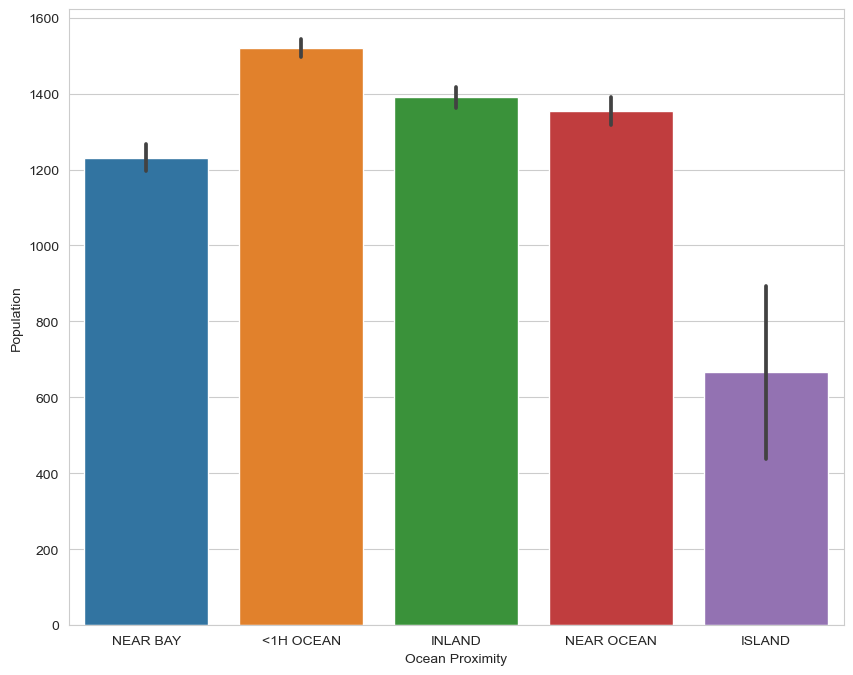

In [107]:
plt.figure(figsize=(10,8))
sns.barplot(data=house_price,x='ocean_proximity',y='population')
plt.xlabel('Ocean Proximity')
plt.ylabel('Population')
plt.show()

Graph of Ocean Proximity vs House Price

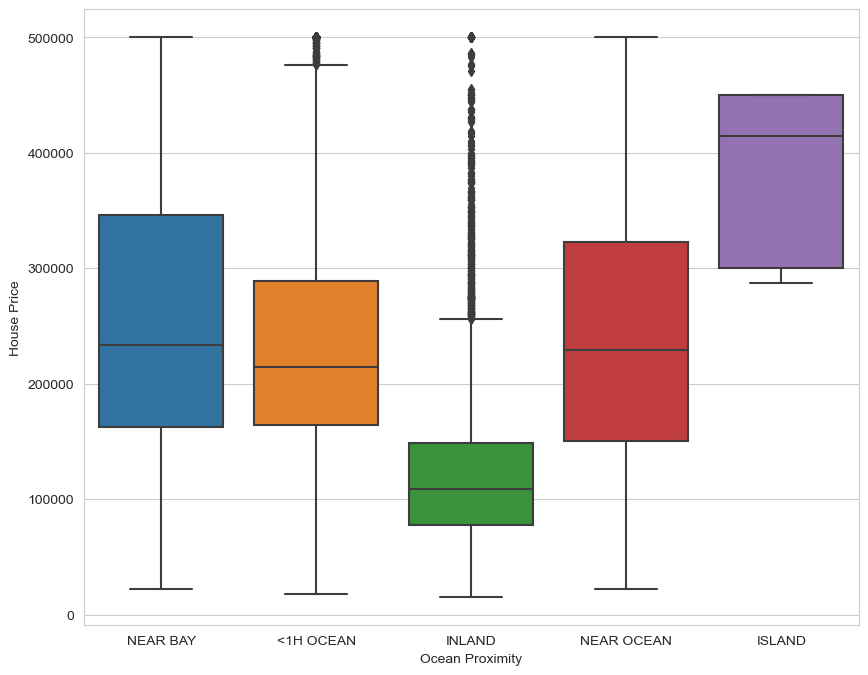

In [112]:
plt.figure(figsize=(10,8))
sns.boxplot(data=house_price,x='ocean_proximity',y='median_house_value',)
plt.xlabel('Ocean Proximity')
plt.ylabel('House Price')
plt.show()

Graph of Household Income vs Population

<Figure size 1000x800 with 0 Axes>

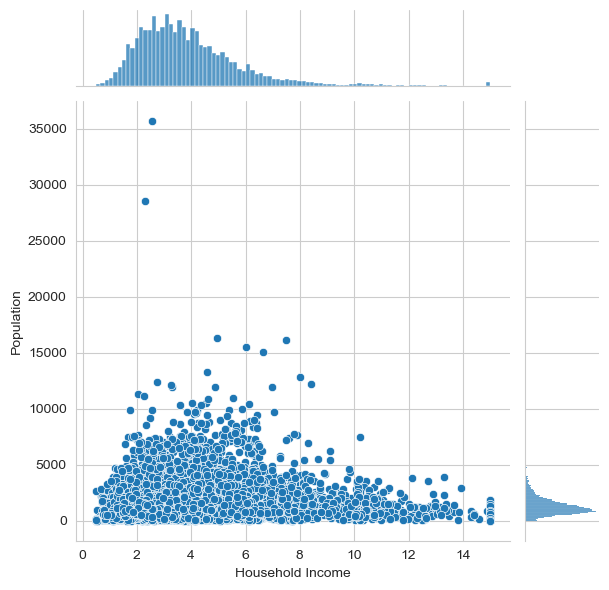

In [151]:
plt.figure(figsize=(10,8))
sns.jointplot(data=house_price,x='median_income',y= 'population')
plt.xlabel('Household Income')
plt.ylabel('Population')
plt.show()

In [152]:
house_price.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


# Convert categorical column in the dataset to numerical data

Getting dummie values for ocean_proximity column

In [232]:
house_price=pd.get_dummies(house_price,columns=['ocean_proximity'],dtype=int)


In [233]:
house_price.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,0,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,0,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,0,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,0,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,0,0,0,1,0


In [234]:
house_price=house_price.apply(round)

In [235]:
house_price.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.0,38.0,41,880,129.0,322,126,8.0,452600,0,0,0,1,0
1,-122.0,38.0,21,7099,1106.0,2401,1138,8.0,358500,0,0,0,1,0
2,-122.0,38.0,52,1467,190.0,496,177,7.0,352100,0,0,0,1,0
3,-122.0,38.0,52,1274,235.0,558,219,6.0,341300,0,0,0,1,0
4,-122.0,38.0,52,1627,280.0,565,259,4.0,342200,0,0,0,1,0


# Training a Linear Regression Model

Defining Features (X) and Target Values(y)

In [236]:
X=house_price.drop('median_house_value',axis=1)
y=house_price['median_house_value']

In [237]:
from sklearn.model_selection import train_test_split

In [238]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [239]:
from sklearn.linear_model import LinearRegression

In [240]:
lm=LinearRegression()

Fitting the model with training data

In [241]:
lm.fit(X_train,y_train)

LinearRegression()

# Model Evaluation 

In [242]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
longitude,-15795.804775
latitude,-15742.042914
housing_median_age,1197.107849
total_rooms,-3.022474
total_bedrooms,55.559642
population,-44.469570
households,100.032803
median_income,37768.279527
ocean_proximity_<1H OCEAN,-28432.264440
ocean_proximity_INLAND,-79289.504642


# Predictions from our Model

In [243]:
predictions = lm.predict(X_test)

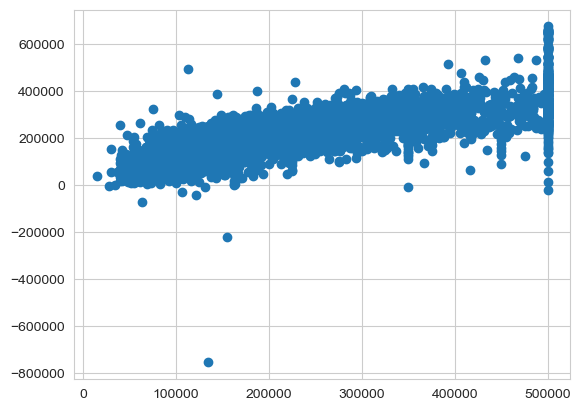

In [244]:
plt.scatter(y_test,predictions)

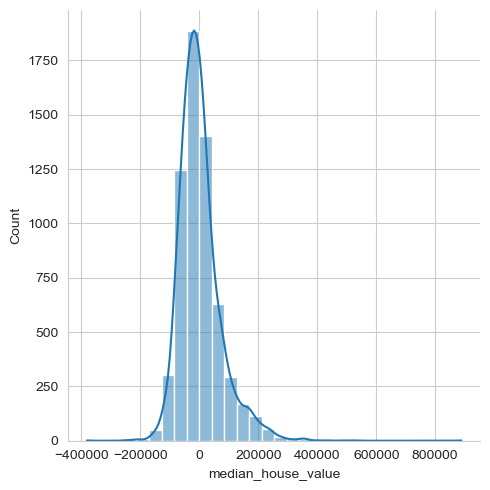

In [245]:
sns.displot((y_test-predictions),bins=30,kde=True)

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$




In [246]:
from sklearn import metrics

In [249]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

RMSE: 72123.49019206397
